### Import des bibliothèques

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pan
import PIL
from PIL import Image
import os
from os import path

print(tf.__version__)

2.0.0


In [2]:
train_dir_path = 'Train/'
test_dir_path = 'Test/'

### Modification des noms de dossiers pour les raccoucirs (Dossier de Train)

counter = 1
for i in os.listdir(train_dir_path):
    if(path.isdir(path.join(train_dir_path,i))):
        os.rename(path.join(train_dir_path,i),path.join(train_dir_path,str(counter)))
        counter+=1

### Modification des noms de dossiers pour les raccourcirs (Dossier de Test)

counter = 1
for i in os.listdir(test_dir_path):
    if(path.isdir(path.join(test_dir_path,i))):
        os.rename(path.join(test_dir_path,i),path.join(test_dir_path,str(counter)))
        counter+=1

### Parcours des dossiers pour récupérer les images et leurs associer une classe de 0 à 61 (Train)

In [3]:
img_list = []
class_counter = 0
class_list = []
for i in os.listdir(train_dir_path):
    if(path.isdir(path.join(train_dir_path,i))):
        for j in os.listdir(path.join(train_dir_path,i)):
            if(j.endswith('.ppm')):
                class_list.append(class_counter)
                img_list.append(np.array(Image.open(os.path.join(os.path.join(train_dir_path,i),j)).resize((28, 28), PIL.Image.ANTIALIAS).crop((2,2,24,24))))
        class_counter +=1

### Parcours des dossiers pour récupérer les images et leurs associer une classe de 0 à 61 (Test)

In [4]:
img_test_list = []
class_counter = 0
class_test_list = []
for i in os.listdir(test_dir_path):
    if(path.isdir(path.join(test_dir_path,i))):
        for j in os.listdir(path.join(test_dir_path,i)):
            if(j.endswith('.ppm')):
                class_test_list.append(class_counter)
                img_test_list.append(np.array(Image.open(os.path.join(os.path.join(test_dir_path,i),j)).resize((28, 28), PIL.Image.ANTIALIAS).crop((2,2,24,24))))
        class_counter +=1

### Définission de X_train_images, y_train_labels, X_test_images et y_train_labels

In [5]:
X_train_images = np.array(img_list)

In [6]:
y_train_labels = np.array(class_list)

In [7]:
X_test_images = np.array(img_test_list)

In [8]:
X_test_images.shape

(2520, 22, 22, 3)

In [9]:
y_test_labels = np.array(class_test_list)

### Normalisation

In [10]:
vol_shape = X_train_images.shape[:-1]

In [11]:
n_voxels = np.prod(vol_shape)

In [12]:
voxel_by_time = X_train_images.reshape(n_voxels,X_train_images.shape[-1])

In [13]:
scaler = StandardScaler()
X_train_images = scaler.fit_transform(voxel_by_time)

In [14]:
X_train_images = X_train_images.reshape(4575,22,22,3)

In [15]:
vol_shape = X_test_images.shape[:-1]

In [16]:
n_voxels = np.prod(vol_shape)

In [17]:
voxel_by_time = X_test_images.reshape(n_voxels,X_test_images.shape[-1])

In [18]:
X_test_images = scaler.fit_transform(voxel_by_time)

In [19]:
X_test_images = X_test_images.reshape(2520,22,22,3)

### Observation du contenu des variables

In [20]:
X_train_images.shape

(4575, 22, 22, 3)

In [21]:
len(X_train_images)

4575

In [22]:
y_train_labels

array([ 0,  0,  0, ..., 61, 61, 61])

In [23]:
X_test_images.shape

(2520, 22, 22, 3)

In [24]:
len(y_test_labels)

2520

### Affichage des 50 premières images de panneaux

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

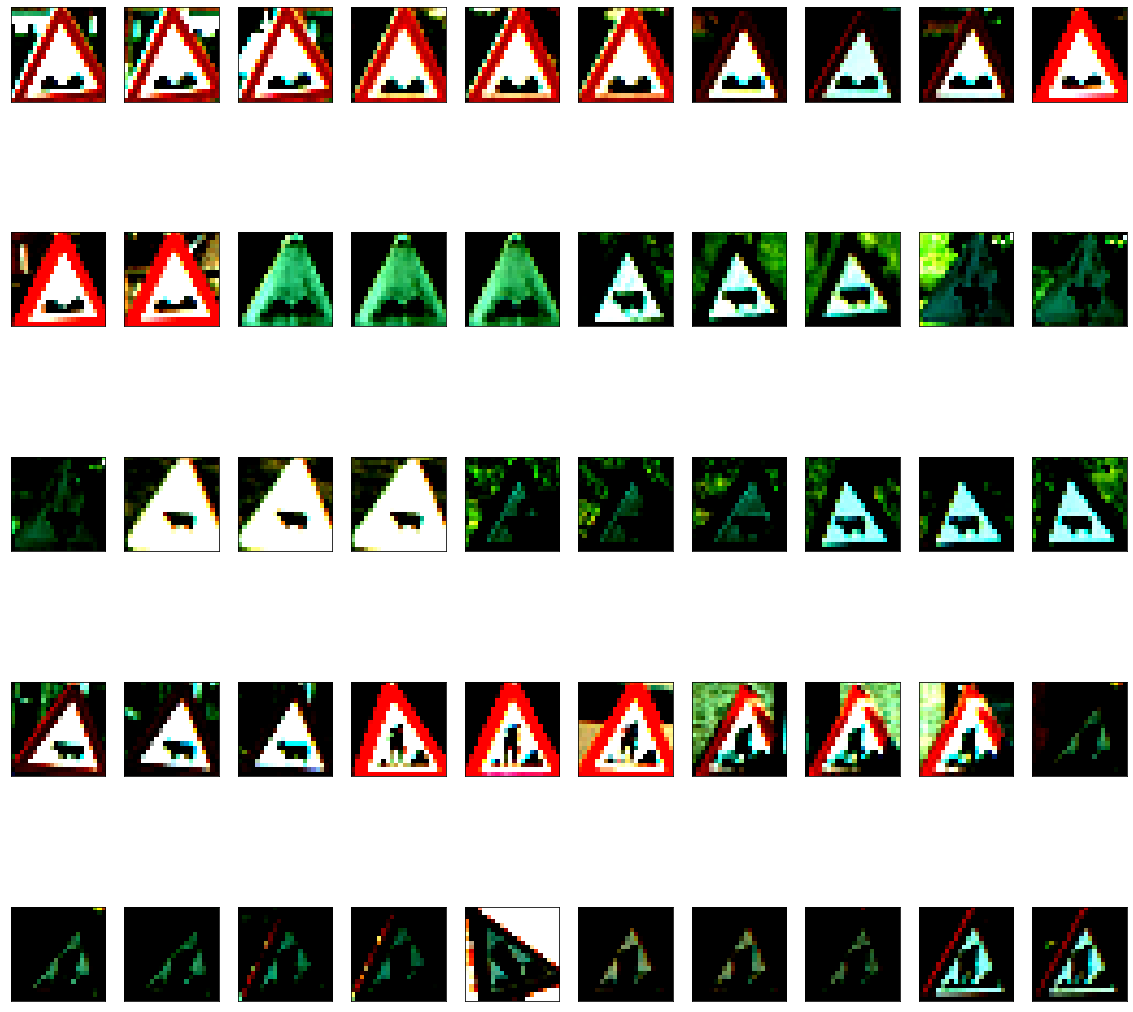

In [25]:
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_images[i])

### Normalisation

### Création du modèle

In [26]:
model = keras.Sequential()

In [27]:
model.add(keras.layers.Conv2D(128,kernel_size=(6,6),input_shape=(22,22,3)))

In [28]:
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

In [29]:
model.add(keras.layers.Conv2D(256,kernel_size=(4,4),strides=2))

In [30]:
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

In [31]:
model.add(keras.layers.Flatten())

In [32]:
model.add(keras.layers.Dense(512,activation='relu'))

In [33]:
model.add(keras.layers.Dropout(0.25))

In [34]:
model.add(keras.layers.Dense(62,activation='softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 17, 17, 128)       13952     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 256)         524544    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [36]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [37]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=20),
    keras.callbacks.ModelCheckpoint('best_signaux.h5',save_best_only=True)
]

In [38]:
history = model.fit(X_train_images,y_train_labels,callbacks=callbacks,epochs=100,batch_size=32,validation_data=(X_test_images,y_test_labels))

Train on 4575 samples, validate on 2520 samples
Epoch 1/100
4575/4575 [==============================] - 6s 1ms/sample - loss: 1.2588 - accuracy: 0.6946 - val_loss: 0.5675 - val_accuracy: 0.8567
Epoch 2/100
4575/4575 [==============================] - 5s 1ms/sample - loss: 0.4433 - accuracy: 0.8844 - val_loss: 0.4236 - val_accuracy: 0.8996
Epoch 3/100
4575/4575 [==============================] - 5s 1ms/sample - loss: 0.2719 - accuracy: 0.9263 - val_loss: 0.4793 - val_accuracy: 0.8806
Epoch 4/100
4575/4575 [==============================] - 6s 1ms/sample - loss: 0.1890 - accuracy: 0.9515 - val_loss: 0.3983 - val_accuracy: 0.9028
Epoch 5/100
4575/4575 [==============================] - 6s 1ms/sample - loss: 0.2183 - accuracy: 0.9432 - val_loss: 0.5508 - val_accuracy: 0.8821
Epoch 6/100
4575/4575 [==============================] - 6s 1ms/sample - loss: 0.1221 - accuracy: 0.9687 - val_loss: 0.3644 - val_accuracy: 0.9222
Epoch 7/100
4575/4575 [==============================] - 6s 1ms/sample

### Observation des résultats

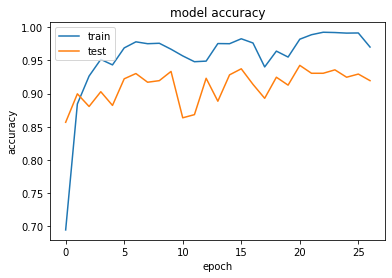

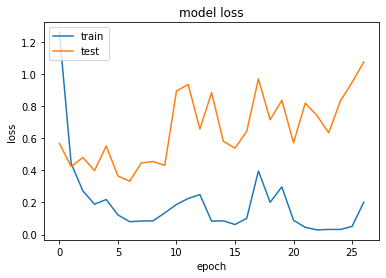

In [39]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

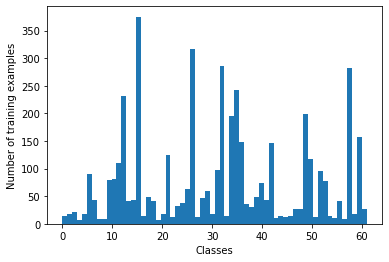

In [40]:
plt.hist(y_train_labels,62)
plt.xlabel("Classes")
plt.ylabel('Number of training examples')
plt.show()

### Évaluation du meilleur modèle

In [41]:
model = keras.models.load_model('best_signaux.h5')
test_loss, test_acc = model.evaluate(X_test_images, y_test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

2520/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.93015873
Test loss: 0.33230867543449466


### Prédiction

In [42]:
prediction = model.predict(X_test_images)

In [43]:
prediction[0]

array([6.0896111e-01, 1.2800653e-08, 3.5948983e-11, 1.0687801e-08,
       1.2261896e-07, 6.0034728e-07, 4.6496345e-07, 1.0148647e-10,
       5.9354452e-08, 2.4361247e-12, 3.8917416e-09, 3.9103180e-01,
       1.9269278e-08, 2.1891569e-09, 1.1699779e-09, 8.2247137e-10,
       8.3546114e-11, 1.0912233e-10, 2.6555447e-11, 2.8246475e-10,
       1.0764110e-08, 7.4073945e-08, 4.6652088e-10, 1.0032812e-12,
       1.3028448e-12, 4.0502882e-11, 6.7043735e-09, 1.4852120e-10,
       5.6977036e-09, 4.2551289e-08, 8.9618951e-10, 1.2226093e-13,
       3.6888618e-08, 3.7134660e-07, 1.9274780e-09, 1.0530811e-09,
       1.6798107e-09, 2.6743947e-13, 2.3841985e-12, 3.6375338e-13,
       2.2325810e-09, 2.3139235e-08, 4.6534157e-10, 9.8319641e-14,
       1.1558716e-08, 2.8051498e-12, 1.8450969e-10, 1.7448779e-10,
       8.7553203e-12, 2.7509117e-10, 5.0115801e-07, 1.0760148e-08,
       7.6726394e-08, 2.8146587e-11, 7.7952720e-08, 5.7037958e-08,
       2.4111637e-07, 2.2258988e-15, 5.2628398e-11, 1.6652671e

In [44]:
np.argmax(prediction[0])

0

In [45]:
model.predict_classes(X_test_images)

array([ 0,  0,  0, ..., 11, 61, 61], dtype=int64)

In [46]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(62), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


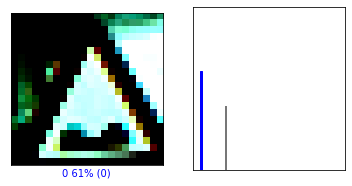

In [47]:
class_names = class_list
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction,y_test_labels,X_test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,y_test_labels)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

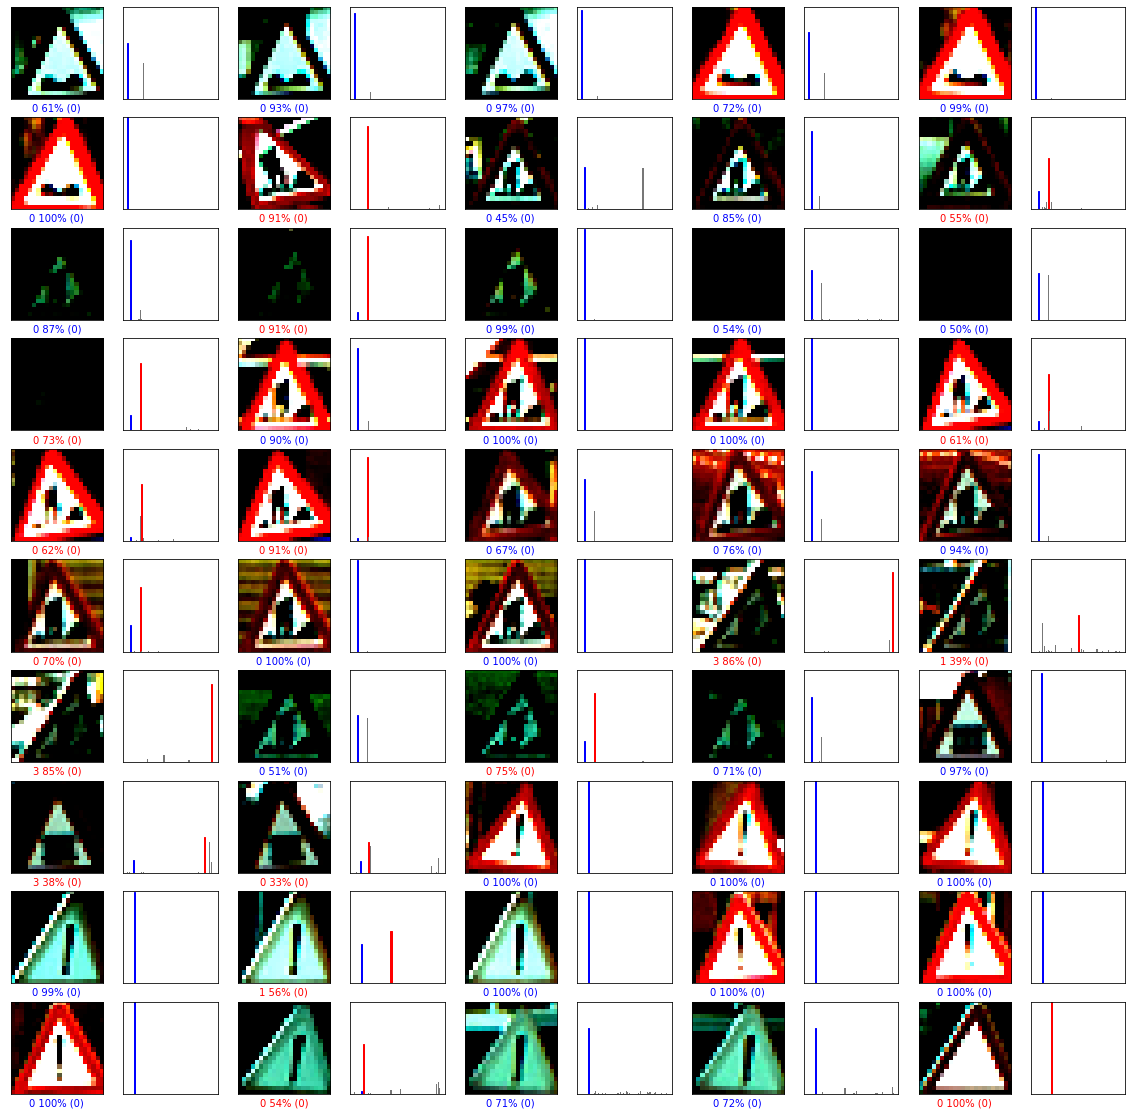

In [48]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, y_test_labels, X_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, y_test_labels)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

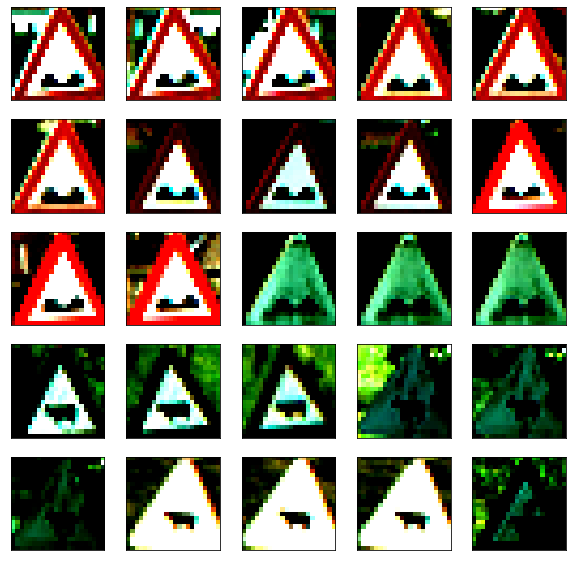

In [50]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_images[i], cmap=plt.cm.binary)
plt.show()